In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import utils

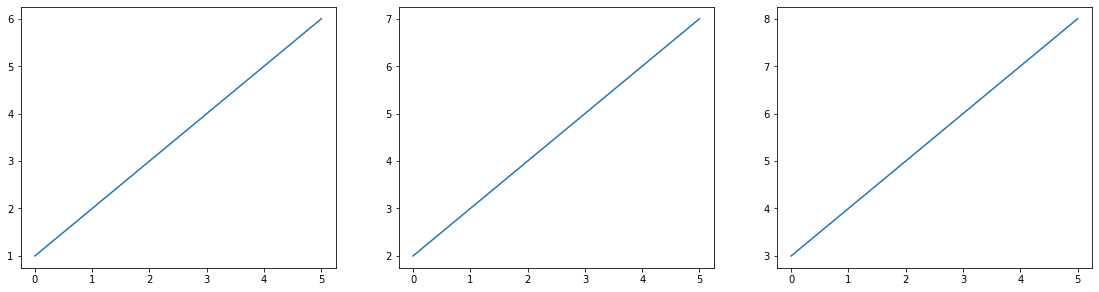

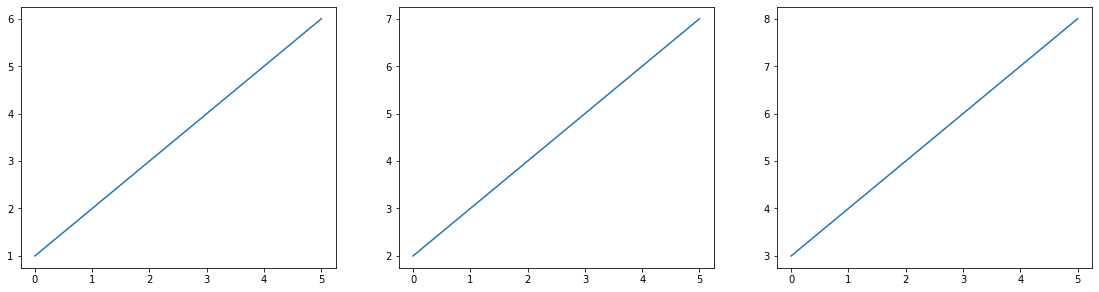

In [10]:
fig, axes = utils.plot.subplots(1,3,keep_shape=True)
x, y = np.linspace(0,5), np.linspace(1,6)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].plot(x, y+j)
plt.show()

fig, axes = utils.plot.subplots(1,3,keep_shape=False)
x, y = np.linspace(0,5), np.linspace(1,6)
for j in range(axes.shape[0]):
    axes[j].plot(x, y+j)
plt.show()